### Step 1: Corpus Construct

In [96]:
import fitz 
import os
import json

def extract_text_from_pdf(pdf_path):
    
    try:
        doc = fitz.open(pdf_path)
        text = ""
        for page_num in range(len(doc)):
            page = doc.load_page(page_num)
            page_text = page.get_text()
            print(f"Page {page_num} text length: {len(page_text)}")
            text += page_text
        return text
    except Exception as e:
        print(f"Error extracting text from {pdf_path}: {e}")
        return ""

# Directory containining PDF data:
pdf_directory = "/Users/QuangAP/Quang_Apollo/NexisUni"

# Check if directory exists:

if not os.path.exists(pdf_directory):
    print(f"Directory does not exist:{pdf_directory}")
else:
    print(f"Directory exist: {pdf_directory}")
    
# List files in the directory
pdf_files= os.listdir(pdf_directory)
print(f"Files in directory: {pdf_files}")

# Remove .DS_Store if it exists
if '.DS_Store' in pdf_files:
    os.remove(os.path.join(pdf_directory, '.DS_Store'))
    pdf_files.remove('.DS_Store')
    print(".DS_Store file removed")
    
# Extract text from all PDFs
extracted_data = []
for pdf_file in pdf_files: 
    if pdf_file.endswith('.pdf'):
        pdf_path = os.path.join(pdf_directory, pdf_file)
        print(f"Processing file: {pdf_path}") # Debugging statement
        pdf_text = extract_text_from_pdf(pdf_path)
        if pdf_text: # Check if anytext was extracted
            extracted_data.append({
                "file_name": pdf_file,
                "text": pdf_text
        })
        print(f"Extracted text from {pdf_file}")
    else: 
        print(f"No text extracted from {pdf_file}")
        

def split_stories(text):
    stories = text.split("End of Document")
    return stories

# Split text into individual stories
all_stories = []
for data in extracted_data:
    stories = split_stories(data['text'])
    for story in stories:
        all_stories.append({
            "file_name": data['file_name'],
            "story_text": story
        })
        print(f"Split story from {data['file_name']}")

# Verify data before writing to JSON
print(f"Total stories extracted: {len(all_stories)}") 

def split_stories(text):
    stories = text.split("End of Document")
    return stories

# Split text into individual stories
all_stories = []
for data in extracted_data:
    stories = split_stories(data['text'])
    for story in stories:
        all_stories.append({
            "file_name": data['file_name'],
            "story_text": story
        })
        print(f"Split story from {data['file_name']}")

# Verify data before writing to JSON
print(f"Total stories extracted: {len(all_stories)}")  


# Save as JSON:
with open('news_corpus1.json', 'w', encoding='utf-8') as f:
    json.dump(all_stories, f, ensure_ascii=False, indent=4)
    print("Data written to news_corpus1.json")

Directory exist: /Users/QuangAP/Quang_Apollo/NexisUni
Files in directory: ['Files700_801.pdf', 'Files901_1000.pdf', 'Files1001_1100.pdf', 'Files501_600.pdf', 'Files201_300.pdf', 'Files401_500.pdf', 'Files1501_1600.pdf', 'Files301_400.pdf', 'Files1201_1300.pdf', 'Files1601_1619.pdf', 'Files1401_1500.pdf', 'Files01_100.pdf', 'Files1301_1400.pdf', 'Files101_200.pdf', 'Files601_700.pdf', 'Files1101_1200.pdf', 'Files801_900.pdf']
Processing file: /Users/QuangAP/Quang_Apollo/NexisUni/Files700_801.pdf
Page 0 text length: 3785
Page 1 text length: 117
Page 2 text length: 2521
Page 3 text length: 3331
Page 4 text length: 2856
Page 5 text length: 3703
Page 6 text length: 453
Page 7 text length: 2522
Page 8 text length: 2535
Page 9 text length: 1467
Page 10 text length: 2538
Page 11 text length: 2408
Page 12 text length: 2734
Page 13 text length: 935
Page 14 text length: 2527
Page 15 text length: 2653
Page 16 text length: 2153
Page 17 text length: 1063
Page 18 text length: 3803
Page 19 text length

### Step 2: Randomly Sampling 500 News Stories

In [80]:
import json
import random

# Load all stories from news_corpus.json
with open('news_corpus.json', 'r', encoding='utf-8') as f:
    all_stories = json.load(f)
    
# Randomly sample 500 stories:
sampled_stories = random.sample(all_stories, 500)

# Write the sampled stories to sample_stories.json
with open('sampled_stories.json', 'w', encoding='utf-8') as f:
    json.dump(sampled_stories,f, ensure_ascii=False, indent=4)

print("Sampled stories written to sampled_stories.json")

Sampled stories written to sampled_stories.json


### Step 3: Pre-Processing Text Data 

Notes: Using the 'sampled_corpus.json' file, not 'sampled_stories.json' file which is newly generated each time running the randomly sampling function. 

In [91]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string
import json

# Append the custom nltk_data directory to the nltk data path
nltk.data.path.append('/Users/QuangAP/nltk_data')

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')


# Path to the JSON file:
file_path = 'sampled_corpus.json'

# Open and read the JSON file
with open(file_path,'r', encoding='utf-8') as f:
    data =json.load(f)

# Initialize the stopwords, stemmer, and other required objects
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

# Add custom stopwords
custome_stopwords = {'said', 'could', 'might', 'like', 'also', 'would'}
stop_words.update(custome_stopwords)


# Define the preprocessing function:
def preprocess_text(text):
    # Lowercasing
    text = text.lower() 
    
    # Tokenization
    tokens = word_tokenize(text) 
    
    # Removing Punctuation
    tokens = [word for word in tokens if word not in string.punctuation]
    
    # Removing Stopwords and single characters
    tokens = [word for word in tokens if word not in stop_words and len(word) > 1]
    
    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    
    # Removing Numbers and Special Characters
    tokens = [word for word in tokens if word.isalpha()]
    
    # Join tokens back into text
    processed_text = ' '.join(tokens)
    
    return processed_text

# Preprocess each story in the sampled_stories
preprocessed_stories = []

for story in data:
    preprocessed_text = preprocess_text(story['story_text'])
    preprocessed_stories.append({
        "file_name": story['file_name'],
        "preprocessed_text": preprocessed_text
    })

print(preprocessed_stories[0])

# Define the path for the output JSON file:
output_file_path = 'preprocessed_stories.json'

# Write the preprocessed stories to the output file
with open('preprocessed_stories.json', 'w', encoding='utf-8') as f:
    json.dump(preprocessed_stories, f, ensure_ascii=False, indent=4)

print("Preprocessed stories written to preprocessed_stories.json")

[nltk_data] Downloading package punkt to /Users/QuangAP/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/QuangAP/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'file_name': 'Files301_400.pdf', 'preprocessed_text': 'third point lead ai automation co ushur raise economic time edition february wednesday delhi edition copyright bennett coleman right reserved section startup tech length word byline bureau highlight investor dig deep winner discover artificial intelligence startup develop large language model generative ai body piggybank bengaluru ushur customer experience automation software provider raised million led third point venture existing backer iron pillar aflac venture pentland venture participated fresh funding round latest capital expected help santa startup expand portfolio software tool develop new technology artificial intelligence including large language model generative ai company plan expand new region europe middle east africa india industry vertical government service military spokesperson told et currently ushur service client australia new zealand country europe united state generates revenue ushur client company total rev

### Step 4: Exploring Data Analysis (EDA)

In [92]:
import pandas as pd

# Load the dataset
df = pd.read_json('preprocessed_stories.json')

# Display the first few rows
print(df.head())

            file_name  \
0  Files301_400.pdf     
1  Files801_900.pdf     
2  Files700_801.pdf     
3  Files1101_1200.pdf   
4  Files901_1000.pdf    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

In [60]:
# Summary statistics of dataset
print(df.info())

# Descriptive statistics of the text column
print(df['preprocessed_text'].describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   file_name          500 non-null    object
 1   preprocessed_text  500 non-null    object
dtypes: object(2)
memory usage: 7.9+ KB
None
count     500
unique    497
top          
freq      4  
Name: preprocessed_text, dtype: object


In [61]:
# Checking for missing values
print(df.isnull().sum())

file_name            0
preprocessed_text    0
dtype: int64


##### Distributing of Text Lengths

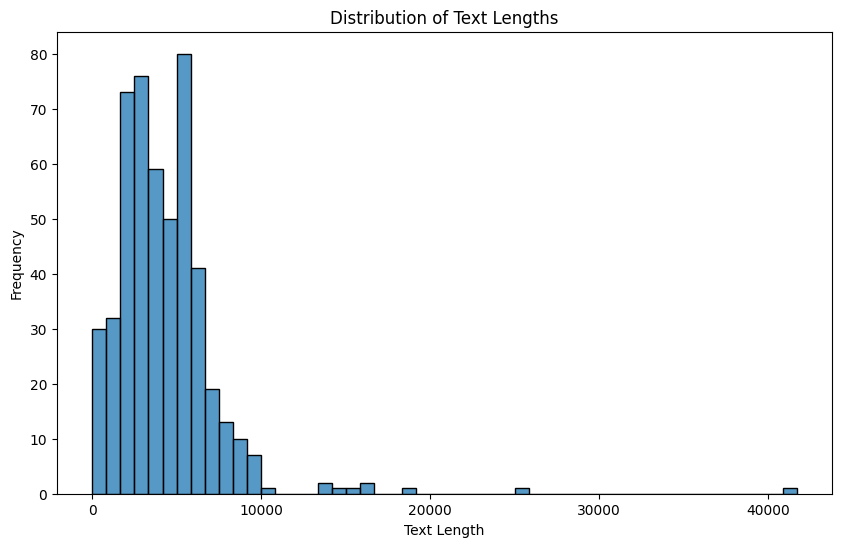

In [62]:
# Add a column for text length
df['text_length'] = df['preprocessed_text'].apply(len)

# Plot the distribution of text lengths
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['text_length'], bins=50)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

##### Common Words

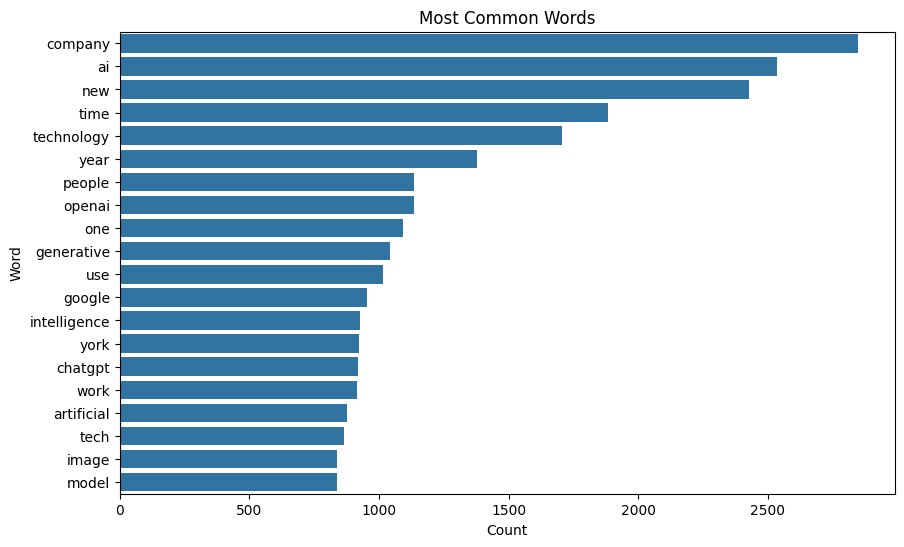

In [63]:
from collections import Counter

# Tokenize cleaned text
all_words = ' '.join(df['preprocessed_text']).split()

# Get the most common words
common_words = Counter(all_words).most_common(20)

# Convert to DataFrame for plotting
common_words_df = pd.DataFrame(common_words, columns=['word', 'count'])

# Plot the common words
plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='word', data=common_words_df)
plt.title('Most Common Words')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

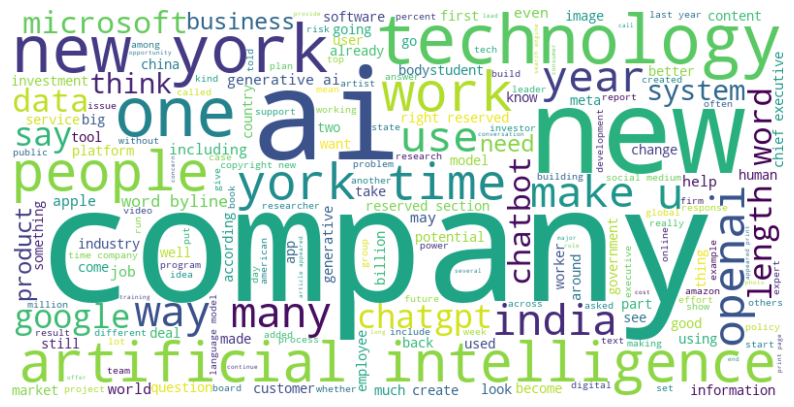

In [64]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['preprocessed_text']))

# Plot the word cloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##### Sentiment Analysis

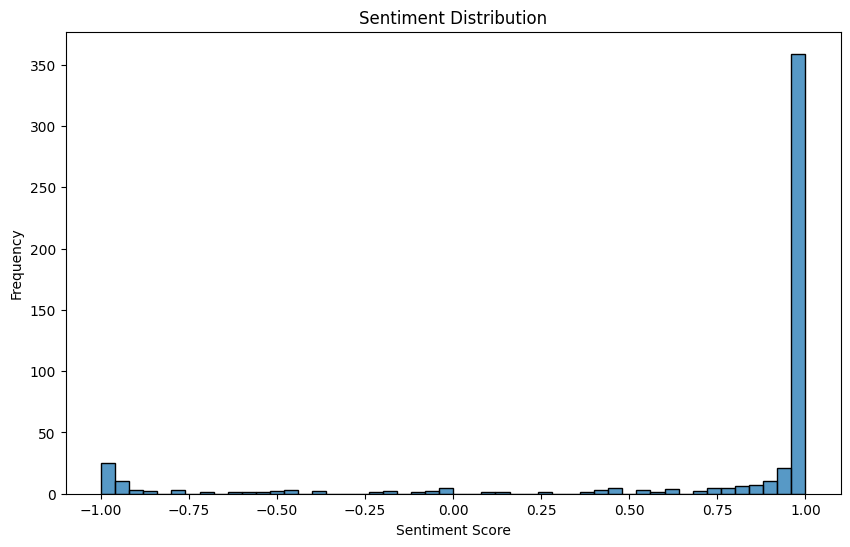

In [88]:
from nltk.sentiment import SentimentIntensityAnalyzer
lexicon_score = "/Users/QuangAP/nltk_data/vader_lexicon/vader_lexicon.txt"

# Initialize the SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer(lexicon_score)

# Compute sentiment scores
df['sentiment'] = df['preprocessed_text'].apply(lambda text: sia.polarity_scores(text)['compound'])

# Plot sentiment distribution
plt.figure(figsize=(10, 6))
sns.histplot(df['sentiment'], bins=50)
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.show()

### Step 5: Vectorization Using TF-IDF 

##### Load the JSON file

In [89]:
import json
import pandas as pd

# Load the preprocessed sample stories
with open ('preprocessed_stories.json', 'r') as file:
    preproccessed_stories = json.load(file)
    
# Convert to DataFrame for convenience
df = pd.DataFrame(preproccessed_stories)

print(df.head())

            file_name  \
0  Files301_400.pdf     
1  Files801_900.pdf     
2  Files700_801.pdf     
3  Files1101_1200.pdf   
4  Files901_1000.pdf    

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                 

##### Vectorizing with TF-IDF

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize the TF-IDF Vectorizer
vectorizer = TfidfVectorizer(max_features=5000)  # You can adjust max_features

# The preprocessed stories are in a column named 'preprocessed_text'
tfidf_matrix = vectorizer.fit_transform(df['preprocessed_text'])

# Convert to a dense matrix (optional, depending on what you need next)
tfidf_dense = tfidf_matrix.todense()

# If you need the feature names (words)
feature_names = vectorizer.get_feature_names_out()

##### Save the Vectorized Data

In [67]:
import numpy as np

# Save as a DataFrame
df_tfidf = pd.DataFrame(tfidf_dense, columns=feature_names)
df_tfidf.to_csv('tfidf_vectors.csv', index=False)

# Or save vectorized file as a Numpy array
np.save('tfidf_vectors.npy', tfidf_dense)

### Step 6: Topic Modeling with LDA

##### Load the TF-IDF Vectors

In [93]:
import pandas as pd
from sklearn.decomposition import LatentDirichletAllocation
from scipy.sparse import csr_matrix

# Step 1: Load TF-IDF vectors
tfidf_vectors = pd.read_csv('tfidf_vectors.csv')

# Step 2: Convert the Dataframe back to the sparse matrix
tfidf_matrix = csr_matrix(tfidf_vectors.values)

##### Fit LDA Model

In [94]:
num_topics = 15
lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
lda_model.fit(tfidf_matrix)

LatentDirichletAllocation(n_components=15, random_state=42)

##### Extract Topics

In [71]:
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))
        

num_top_words  = 20
feature_names = tfidf_vectors.columns
display_topics(lda_model,feature_names, num_top_words)

Topic 0:
lensa cohen skilling wayve secondary ftx hcltech romita majumdar snap sternfels spiegel gdp floor citation perlmutter participated alabama niue thaler
Topic 1:
patient genai doctor tc automation workforce infosys cyber crore bengaluru cognizant medical leverage efficiency fm wipro bfsi mckinsey autonomous slide
Topic 2:
rizz puzzle shopper oxford crossword grathwohl tos charging sensor holland swiftie harvest continuously multimedia variation prince solving tip toe hello
Topic 3:
autor wpp sora lecun galactica arctos neutrality yann globalization alpha laura suite organizing hateful baseball warm stupid academia frank salary
Topic 4:
warhol hamas ezra shakespeare quazzo laguna korean consolidation gsv lg soup prince appropriation campbell can orange thai burn chemical administrator
Topic 5:
march musk health child usa lot solution officer prompt asked amd skill car key adobe capability idea launch fact writing
Topic 6:
bag brockman gift meal trip instacart moderation traveler 

##### Assign Categories to Topics

In [72]:
# Define categories for each topic
topic_categories = {
    0: "Technology and Economy",
    1: "Healthcare and Automation",
    2: "Games and Puzzles",
    3: "Academia and Globalization",
    4: "Culture and Media",
    5: "Technology and Innovation",
    6: "Travel and Leisure",
    7: "AI and Technology",
    8: "Marketing and Sustainability",
    9: "Education and Society",
    10: "Ethics and Technology",
    11: "Technology and Media",
    12: "Miscellaneous",
    13: "Mental Health and Therapy",
    14: "Health and Communication"
}

# Display topics with assigned categories

def display_topics_with_categories(model, feature_names, num_top_words, topic_categories):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d: %s" % (topic_idx, topic_categories.get(topic_idx, "Undefined")))
        top_words = [feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]
        print("Top Words:", ", ".join(top_words))
        print()
        
# Call the function to display topics with assigned categories
display_topics_with_categories(lda_model, feature_names, num_top_words, topic_categories)

Topic 0: Technology and Economy
Top Words: lensa, cohen, skilling, wayve, secondary, ftx, hcltech, romita, majumdar, snap, sternfels, spiegel, gdp, floor, citation, perlmutter, participated, alabama, niue, thaler

Topic 1: Healthcare and Automation
Top Words: patient, genai, doctor, tc, automation, workforce, infosys, cyber, crore, bengaluru, cognizant, medical, leverage, efficiency, fm, wipro, bfsi, mckinsey, autonomous, slide

Topic 2: Games and Puzzles
Top Words: rizz, puzzle, shopper, oxford, crossword, grathwohl, tos, charging, sensor, holland, swiftie, harvest, continuously, multimedia, variation, prince, solving, tip, toe, hello

Topic 3: Academia and Globalization
Top Words: autor, wpp, sora, lecun, galactica, arctos, neutrality, yann, globalization, alpha, laura, suite, organizing, hateful, baseball, warm, stupid, academia, frank, salary

Topic 4: Culture and Media
Top Words: warhol, hamas, ezra, shakespeare, quazzo, laguna, korean, consolidation, gsv, lg, soup, prince, approp

##### Assigning Topics to Documents

In [73]:
# Obtain document-topic distribution matrix
document_topic_distribution = lda_model.transform(tfidf_matrix)

document_topics = []
for i, document in enumerate(document_topic_distribution):
    dominant_topic = document.argmax()  # Identify dominant topic
    topic_label = topic_categories.get(dominant_topic, "Undefined")  # Assign topic label
    document_topics.append({"document_id": i, "topic": topic_label})
    
# Print document-topic assignment
for doc_topic in document_topics:
    print("Document ID:", doc_topic["document_id"], "- Topic:", doc_topic["topic"])

Document ID: 0 - Topic: AI and Technology
Document ID: 1 - Topic: AI and Technology
Document ID: 2 - Topic: AI and Technology
Document ID: 3 - Topic: Technology and Innovation
Document ID: 4 - Topic: AI and Technology
Document ID: 5 - Topic: AI and Technology
Document ID: 6 - Topic: AI and Technology
Document ID: 7 - Topic: AI and Technology
Document ID: 8 - Topic: AI and Technology
Document ID: 9 - Topic: AI and Technology
Document ID: 10 - Topic: AI and Technology
Document ID: 11 - Topic: AI and Technology
Document ID: 12 - Topic: AI and Technology
Document ID: 13 - Topic: AI and Technology
Document ID: 14 - Topic: AI and Technology
Document ID: 15 - Topic: AI and Technology
Document ID: 16 - Topic: AI and Technology
Document ID: 17 - Topic: Technology and Innovation
Document ID: 18 - Topic: AI and Technology
Document ID: 19 - Topic: AI and Technology
Document ID: 20 - Topic: AI and Technology
Document ID: 21 - Topic: AI and Technology
Document ID: 22 - Topic: AI and Technology
Docum

### Step 7: Visualize the LDA topics

##### Visualizing with Matplotlib

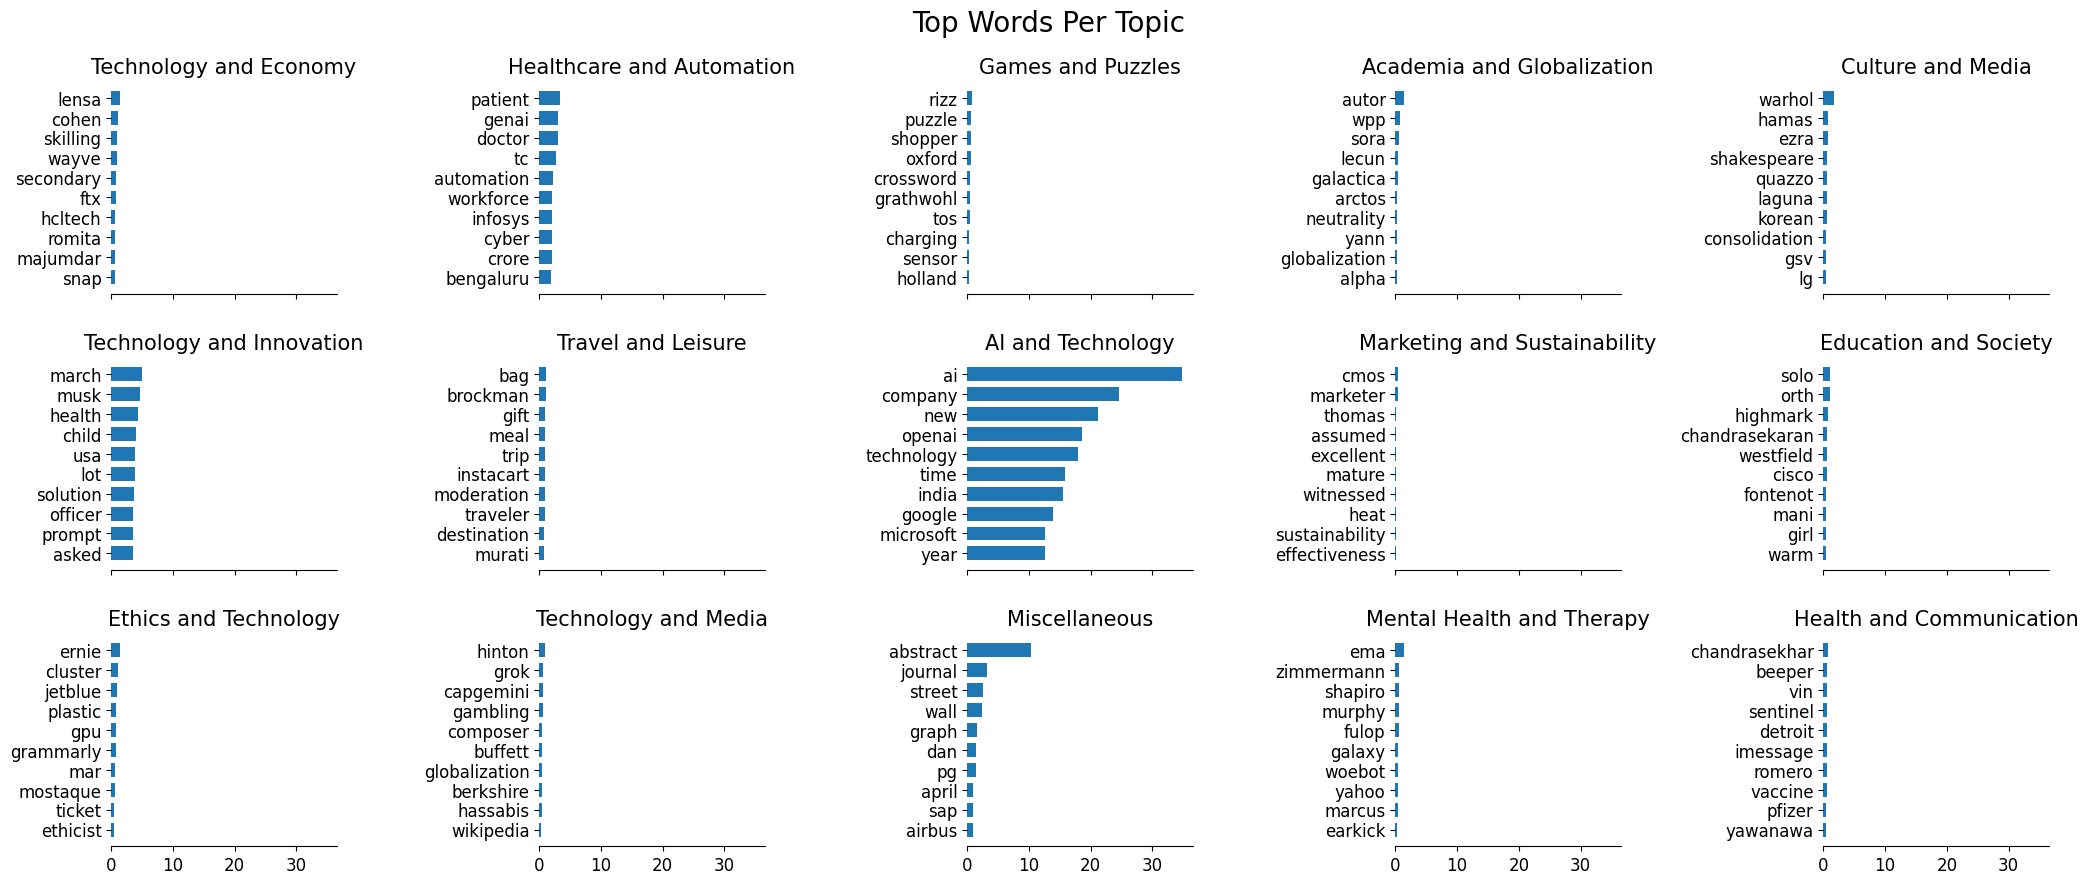

In [95]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import matplotlib.pyplot as plt
import numpy as np

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Define topic names
topic_names = [
    "Technology and Economy",
    "Healthcare and Automation",
    "Games and Puzzles",
    "Academia and Globalization",
    "Culture and Media",
    "Technology and Innovation",
    "Travel and Leisure",
    "AI and Technology",
    "Marketing and Sustainability",
    "Education and Society",
    "Ethics and Technology",
    "Technology and Media",
    "Miscellaneous",
    "Mental Health and Therapy",
    "Health and Communication"
]

# Plot the top words for each topic
def plot_top_words(model, feature_names, n_top_words, title, topic_names=None):
    num_topics = len(model.components_)
    ncols = min(num_topics, 5)  # Maximum number of columns
    nrows = (num_topics // ncols) + (num_topics % ncols > 0)  # Calculate number of rows
    
    fig, axes = plt.subplots(nrows, ncols, figsize=(5 * ncols, 3 * nrows), sharex=True)
    axes = axes.flatten()  # Flatten axes for easy iteration
    
    for topic_idx, topic in enumerate(model.components_):
        if topic_idx >= num_topics:  # Check if topic index exceeds the number of topics
            break  # Exit loop if all topics have been plotted
        
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = [feature_names[i] for i in top_features_ind]
        weights = topic[top_features_ind]
        
        ax = axes[topic_idx]
        if topic_names is not None:
            ax.set_title(topic_names[topic_idx], fontsize=15)
        else:
            ax.set_title(f'Topic {topic_idx}', fontsize=15)
        ax.barh(top_features, weights, height=0.7)
        ax.invert_yaxis()
        ax.tick_params(axis='both', which='major', labelsize=12)
        for i in 'top right left'.split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=20)

    # Hide any extra subplots
    for i in range(num_topics, len(axes)):
        axes[i].axis('off')
        
    plt.subplots_adjust(top=0.90, bottom=0.05, wspace=0.90, hspace=0.3)
    plt.show()

plot_top_words(lda_model, feature_names, n_top_words=10, title='Top Words Per Topic', topic_names=topic_names)

##### Visualizing with "WordCloud"

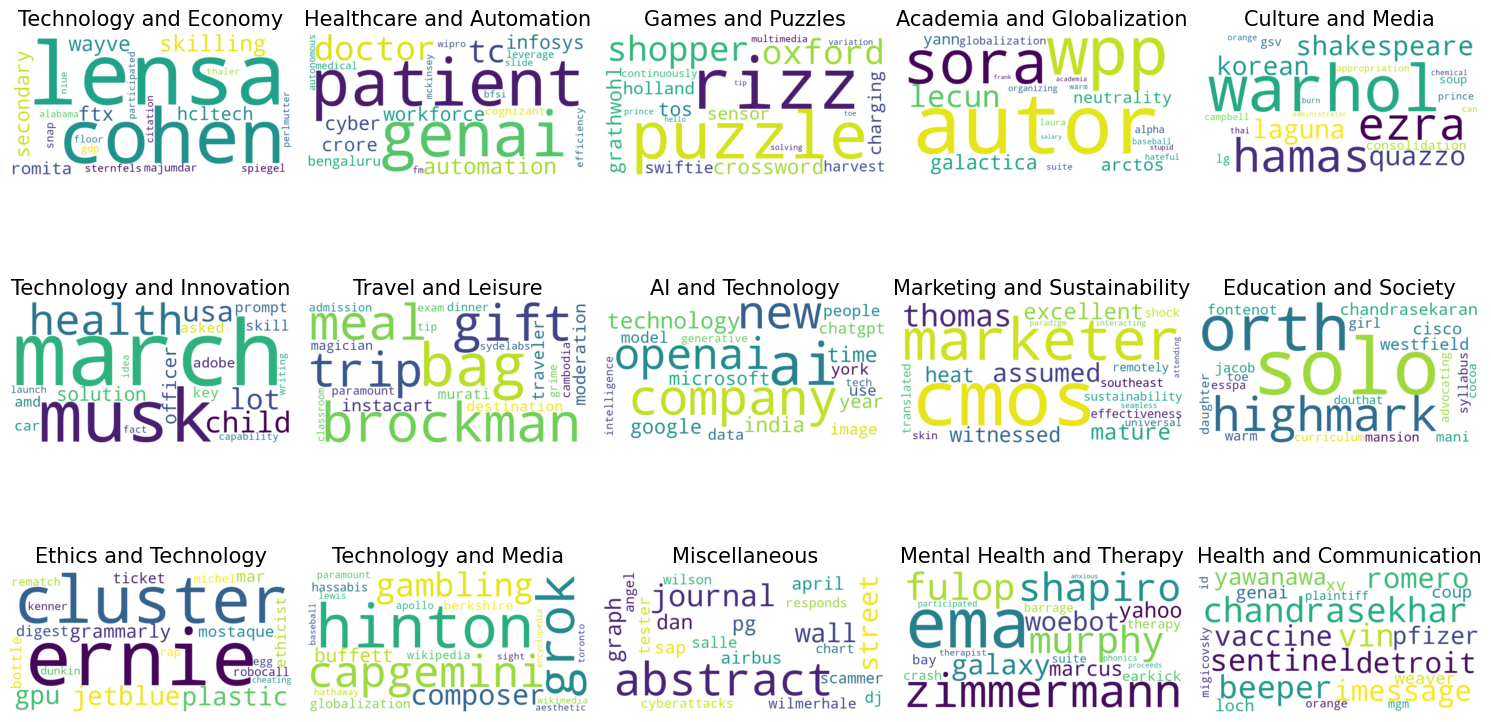

In [82]:
from wordcloud import WordCloud

# Define topic names
topic_names = [
    "Technology and Economy",
    "Healthcare and Automation",
    "Games and Puzzles",
    "Academia and Globalization",
    "Culture and Media",
    "Technology and Innovation",
    "Travel and Leisure",
    "AI and Technology",
    "Marketing and Sustainability",
    "Education and Society",
    "Ethics and Technology",
    "Technology and Media",
    "Miscellaneous",
    "Mental Health and Therapy",
    "Health and Communication"
]

# Create word clouds for each topic
def plot_word_clouds(model, feature_names, num_topics, n_top_words, topic_names=None):
    # Create subplots based on the number of topics
    fig, axes = plt.subplots(num_topics // 5, 5, figsize=(15, 3 * (num_topics // 5)), sharex=True, sharey=True)
    axes = axes.flatten()  # Flatten the axes for easy iteration
    
    # Generate a word cloud for each topic
    for topic_idx, topic in enumerate(model.components_):
        # Get the top words and their weights for the current topic
        top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
        top_features = {feature_names[i]: topic[i] for i in top_features_ind}
        
        # Generate a word cloud for the current topic
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(top_features)
        
        # Plot the word cloud
        ax = axes[topic_idx]
        if topic_names is not None:
            ax.set_title(topic_names[topic_idx], fontsize=15)
        else:
            ax.set_title(f'Topic {topic_idx}', fontsize=15)
        ax.imshow(wordcloud, interpolation='bilinear')
        ax.axis('off')
    
    # Hide any extra subplots
    for i in range(num_topics, len(axes)):
        axes[i].axis('off')
    
    plt.tight_layout()
    plt.show()

plot_word_clouds(lda_model, feature_names, num_topics=num_topics, n_top_words=20, topic_names=topic_names)

##### Visualizing Frequencies of Topics

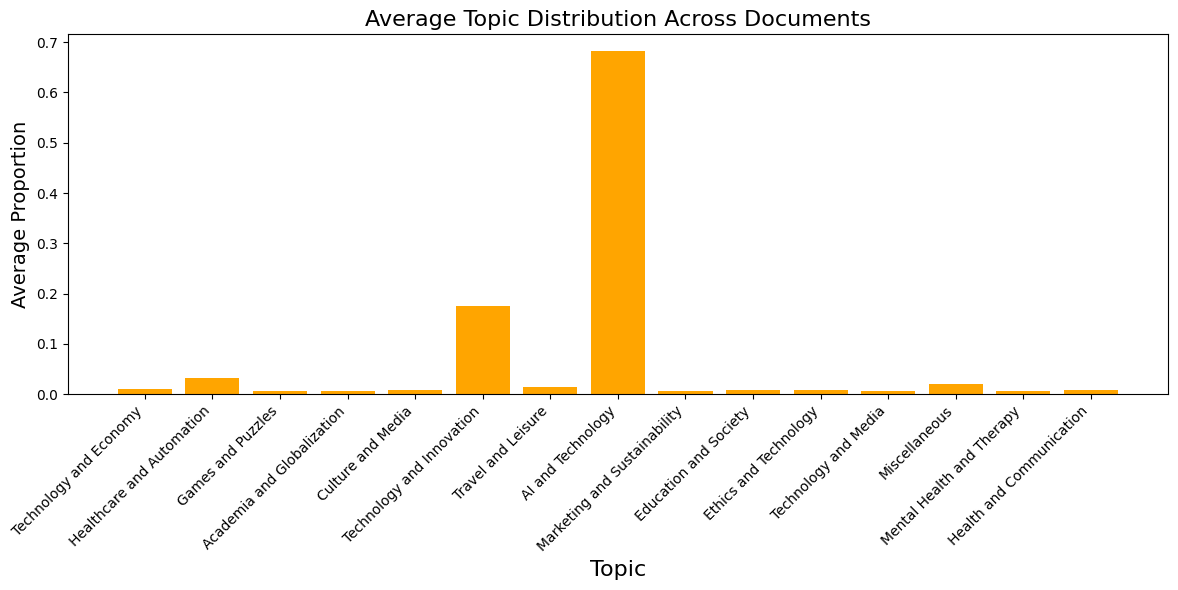

In [83]:
import matplotlib.pyplot as plt

# Get topic distribution for each document
topic_distribution = lda_model.transform(tfidf_matrix)

# Calculate the average topic distribution across all documents
average_topic_distribution = topic_distribution.mean(axis=0)

# Define topic names
topic_names = [
    "Technology and Economy",
    "Healthcare and Automation",
    "Games and Puzzles",
    "Academia and Globalization",
    "Culture and Media",
    "Technology and Innovation",
    "Travel and Leisure",
    "AI and Technology",
    "Marketing and Sustainability",
    "Education and Society",
    "Ethics and Technology",
    "Technology and Media",
    "Miscellaneous",
    "Mental Health and Therapy",
    "Health and Communication"
]

# Plot the average topic distribution with topic names
plt.figure(figsize=(12, 6))
plt.bar(range(len(average_topic_distribution)), average_topic_distribution, color='orange')
plt.xlabel('Topic', fontsize=16)
plt.ylabel('Average Proportion', fontsize=14)
plt.title('Average Topic Distribution Across Documents', fontsize=16)
plt.xticks(range(len(average_topic_distribution)), topic_names, rotation=45, ha='right')
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [77]:
import pandas as pd

# Get feature names
feature_names = vectorizer.get_feature_names_out()

# Number of top words per topic to display
n_top_words = 20

# Extract the topics and their terms
topics = []
for topic_idx, topic in enumerate(lda_model.components_):
    top_features_ind = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_ind]
    topics.append(f"Topic {topic_idx}")

# Create a dataframe to display the topics
df_topics = pd.DataFrame({
    'Topic': [f"Topic {i}" for i in range(num_topics)],
    'Terms per Topic': [" ".join([feature_names[i] for i in lda_model.components_[topic_idx].argsort()[:-n_top_words - 1:-1]]) for topic_idx in range(num_topics)]
})

# Display the dataframe
print(df_topics)

       Topic  \
0   Topic 0    
1   Topic 1    
2   Topic 2    
3   Topic 3    
4   Topic 4    
5   Topic 5    
6   Topic 6    
7   Topic 7    
8   Topic 8    
9   Topic 9    
10  Topic 10   
11  Topic 11   
12  Topic 12   
13  Topic 13   
14  Topic 14   

                                                                                                                                                                         Terms per Topic  
0   lensa cohen skilling wayve secondary ftx hcltech romita majumdar snap sternfels spiegel gdp floor citation perlmutter participated alabama niue thaler                                
1   patient genai doctor tc automation workforce infosys cyber crore bengaluru cognizant medical leverage efficiency fm wipro bfsi mckinsey autonomous slide                              
2   rizz puzzle shopper oxford crossword grathwohl tos charging sensor holland swiftie harvest continuously multimedia variation prince solving tip toe hello                         

In [84]:
import pyLDAvis.lda_model
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pyLDAvis.gensim_models

##### Visualizing  LDA results with pyLDAvis

In [85]:
lda_vis = pyLDAvis.lda_model.prepare(lda_model, tfidf_matrix, vectorizer)

/Users/QuangAP/Library/Python/3.12/lib/python/site-packages/dateutil/tz/tz.py:37: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  EPOCH = datetime.datetime.utcfromtimestamp(0)
/Users/QuangAP/Library/Python/3.12/lib/python/site-packages/dateutil/tz/tz.py:37: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  EPOCH = datetime.datetime.utcfromtimestamp(0)
/Users/QuangAP/Library/Python/3.12/lib/python/site-packages/dateutil/tz/tz.py:37: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datet

In [87]:
# In a Jupyter notebook
pyLDAvis.display(lda_vis)

In [86]:
# Or Save the visualization to an HTML file which can be interface adjustable
pyLDAvis.save_html(lda_vis, 'lda_vis.html')
